In [2]:
#Autor: Izan García Leñero

#importa SpaCy y carga el modelo en inglés
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
#importammos git
# !pip3 install git
# import git

#cargamos el modelo en inglés
nlp = spacy.load("en_core_web_sm")

#Clonar el corpus desde GitHub con el siguiente link https://github.com/COST-ELTeC/ELTeC-eng.git




  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
#!git clone https://github.com/COST-ELTeC/ELTeC-eng.git

C:\Users\izangale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[('I', 3168), ('it', 2587), ('you', 2556), ('he', 2041), ('she', 1684), ('him', 1174), ('that', 1056), ('which', 1052), ('me', 869), ('her', 861)]


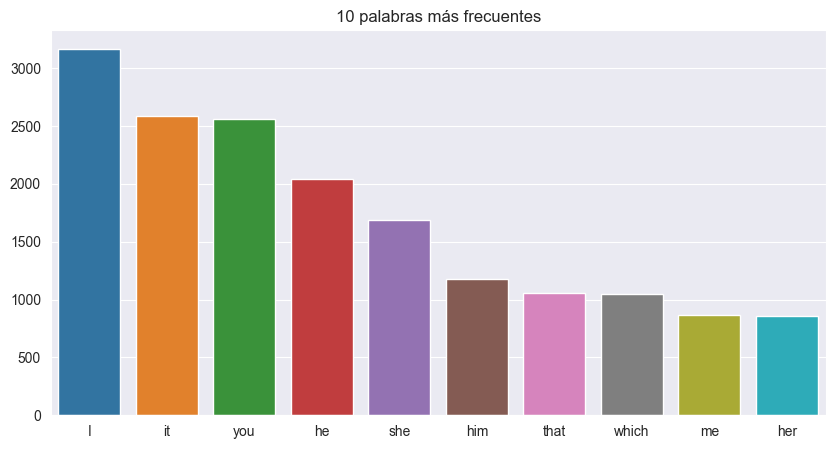

In [3]:
#abrir una única novela en la carpeta level1 de ELTeC-eng XML
!pip install bs4
!pip install matplotlib
with open('.\ELTeC-eng\level1\ENG18400_Trollope.xml', 'r') as file:
    text = file.read()
#procesar el XML y extraer los parrafos, se recomienda usar la librería BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser')
parrafos = soup.find_all('p')


#Analizar el texto con el pipeline básico de SpaCy y extraer un CSV con “palabra | lema | categoria_gramatical | tipo de dependencia sintáctica | palabra de quien depende 
import csv
with open('analisis.csv', 'w') as file:
    writer = csv.writer(file)
    for parrafo in parrafos:
        doc = nlp(parrafo.text)
        for token in doc:
            writer.writerow([token.text, token.lemma_, token.pos_, token.dep_, token.head.text])

#Extraer los 10 grupos nominales más frecuentes (opcional: mostrar en un gráfico). para ello recorre cada uno de los parrafos y extrae los grupos nominales nlp
#y los guarda en una lista. Una vez extraidos todos los grupos nominales, cuenta cuantas veces aparece cada uno de ellos y muestra los 10 más frecuentes
from collections import Counter
grupos_nominales = []
for parrafo in parrafos:
    doc = nlp(parrafo.text)
    for chunk in doc.noun_chunks:
        grupos_nominales.append(chunk.text)
frecuencia = Counter(grupos_nominales)
print(frecuencia.most_common(10))

#grafica las 10 palabras más frecuentes
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.title('10 palabras más frecuentes')
sns.barplot(x=[x[0] for x in frecuencia.most_common(10)], y=[x[1] for x in frecuencia.most_common(10)])
plt.show()






[('Michael', 682), ('Matthew', 445), ('Martha', 407), ('Mary', 376), ('Brotherton', 327), ('one', 209), ('first', 203), ('Tremlett', 192), ('two', 162), ('Edward', 151)]


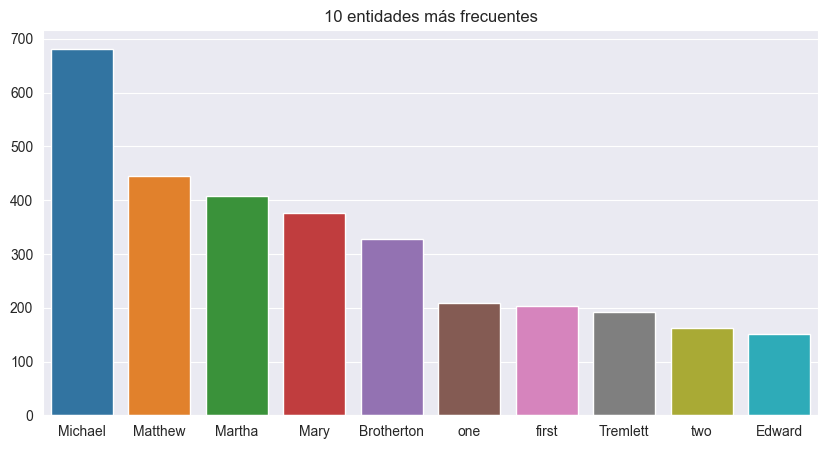

In [4]:

#Extraer las 10 entidades nombradas más frecuentes (opcional: mostrar en un gráfico).para ello recorre cada uno de los parrafos y extrae las entidades nlp
#y los guarda en una lista. Una vez extraidos todos las entidades, cuenta cuantas veces aparece cada uno de ellos y muestra los 10 más frecuentes
from collections import Counter
entidades = []
for parrafo in parrafos:
    doc = nlp(parrafo.text)
    for ent in doc.ents:
        entidades.append(ent.text)
frecuencia = Counter(entidades)
print(frecuencia.most_common(10))

#grafica las 10 palabras más frecuentes
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.title('10 entidades más frecuentes')
sns.barplot(x=[x[0] for x in frecuencia.most_common(10)], y=[x[1] for x in frecuencia.most_common(10)])
plt.show()


[('boy', 367), ('man', 260), ('mother', 246), ('time', 242), ('thing', 240), ('factory', 235), ('eyes', 234), ('way', 233), ('child', 228), ('lady', 225)]
[('little', 682), ('poor', 376), ('good', 357), ('young', 336), ('dear', 336), ('great', 250), ('more', 236), ('other', 235), ('own', 233), ('such', 209)]
[('said', 729), ('know', 438), ('replied', 432), ('think', 353), ('do', 349), ('have', 335), ('see', 273), ('say', 273), ('had', 267), ('made', 255)]
[('so', 793), ('very', 682), ('as', 355), ('now', 341), ('then', 330), ('too', 321), ('more', 304), ('again', 289), ('well', 285), ('never', 272)]


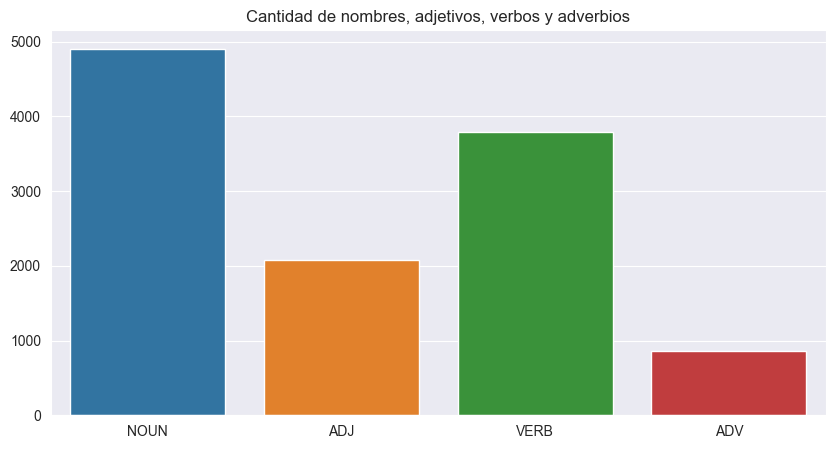

In [5]:
#Crear un gráfico donde se muestren la cantidad de nombres, adjetivos, verbos y adverbios.  (opcional: mostrar en un gráfico). para ello recorre cada uno de los parrafos y extrae nombres, adjetivos, verbos y adverbios nlp
#y los guarda en una lista. Una vez extraidos todos las entidades, cuenta cuantas veces aparece cada uno de ellos.
from collections import Counter
nombres = []
adjetivos = []
verbos = []
adverbios = []
for parrafo in parrafos:
    doc = nlp(parrafo.text)
    for token in doc:
        if token.pos_ == 'NOUN':
            nombres.append(token.text)
        elif token.pos_ == 'ADJ':
            adjetivos.append(token.text)
        elif token.pos_ == 'VERB':
            verbos.append(token.text)
        elif token.pos_ == 'ADV':
            adverbios.append(token.text)
frecuencia_nombres = Counter(nombres)
frecuencia_adjetivos = Counter(adjetivos)
frecuencia_verbos = Counter(verbos)
frecuencia_adverbios = Counter(adverbios)
print(frecuencia_nombres.most_common(10))
print(frecuencia_adjetivos.most_common(10))
print(frecuencia_verbos.most_common(10))
print(frecuencia_adverbios.most_common(10))

#grafica la cantidad de nombres, adjetivos, verbos y adverbios
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.title('Cantidad de nombres, adjetivos, verbos y adverbios')
sns.barplot(x=['NOUN', 'ADJ', 'VERB', 'ADV'], y=[len(frecuencia_nombres), len(frecuencia_adjetivos), len(frecuencia_verbos), len(frecuencia_adverbios)])
plt.show()





In [17]:
#Realizar análisis de dependencias del corpus /workspaces/master-ua/Minería de textos/ELTeC-eng/level1/ENG18400_Trollope.xml' con SpaCy y extraer en formato CONLL. Desde SpaCy se puede utilizar STANZA y UD-Pipe.
#Para ello se debe instalar STANZA y UD-Pipe
!pip install stanza
!pip install udpipe
!pip install spacy-conll
!python -m spacy download en_core_web_sm
!pip install pandas
import pandas as pd


#se importan las librerias
import stanza
import spacy
import spacy_conll

#se carga el modelo con spacy load
nlp = spacy.load('en_core_web_sm')
#añade el pipeline conll_formatter
nlp.add_pipe("conll_formatter", last=True)


#se procesa el corpus parrado a parrafo y muestra el resultado en un dataframe  
from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser')
parrafos = soup.find_all('p')
for parrafo in parrafos:
    if parrafo.text != '': 
        doc = nlp(parrafo.text)
        # print(doc._.conll_pd)
        df = pd.DataFrame(doc._.conll_pd)
        df

#muestra el resultado en un dataframe  
# import pandas as pd
# pd.set_option('display.max_colwidth', None)
# df = pd.DataFrame(doc._.conll_pd)
# df


            



ERROR: Could not find a version that satisfies the requirement udpipe (from versions: none)
ERROR: No matching distribution found for udpipe


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 991.0 kB/s eta 0:00:13
     --------------------------------------- 0.1/12.8 MB 991.0 kB/s eta 0:00:13
     --------------------------------------- 0.1/12.8 MB 722.1 kB/s eta 0:00:18
     --------------------------------------- 0.1/12.8 MB 722.1 kB/s eta 0:00:18
      -------------------------------------- 0.2/12.8 MB 734.2 kB/s eta 0:00:18
      -------------------------------------- 0.2/12.8 MB 734.2 kB/s eta 0:00:18
      -------------------------------------- 0.3/12.8 MB 803.7 kB/s eta 0:00:16
      -------------------------------------- 0.3/12.8 MB 803.7 kB/s eta 0:00:16
     - ------------------------------------- 0.4/12.8 MB 904.2 kB/s eta 0:00:14
     - ------------------------------------- 0.4/12.8 MB 904.2 kB/s eta 0:00:14
     -- ------------------------------------- 0.6/12.8 M

C:\Users\izangale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [16]:
#Dado un fragmento del corpus lematizado, se extrae el synset mas frecuente. Utiliza WordNet de NLTK
#se importan las librerias
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

#define la función get_synset que recibe un fragmento del corpus lematizado y devuelve cada symset y su frecuencia
def get_synset(text):
    synsets = []
    #itera token a token
    for token in text:
        #obtiene el synset de cada token
        synset = wn.synsets(token.lemma_)
        #si el token tiene synset lo guarda en la lista synsets
        if synset:
            synsets.append(synset[0])
        #almacen todos los synsets y su frecuencia
    synsets = Counter(synsets)
    #devuelve el synset más frecuente si hay alguno
    if synsets:
        return synsets.most_common(1)[0]
    else:
        return None, None

#se procesa el corpus parrado a parrafo, guarda en un dataframe el resultado de la función get_synset
from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser')
parrafos = soup.find_all('p')
#instala pandas
!pip install pandas
import pandas as pd
df = pd.DataFrame(columns=['synset', 'frecuencia'])

for parrafo in parrafos:
    if parrafo.text != '': 
        doc = nlp(parrafo.text)
        synset, frecuencia = get_synset(doc)
        #añadimos el symset si no esta vacio
        if synset:
        #si no esta el synset.name() lo añade
            if synset.name() not in df['synset'].values:
                df = df.append({'synset': synset.name(), 'frecuencia': frecuencia}, ignore_index=True)
            #si esta el synset.name() suma la frecuencia
            else:
                df.loc[df['synset'] == synset.name(), 'frecuencia'] += frecuencia

#muestra los synsets más frecuentes
df.sort_values(by=['frecuencia'], ascending=False).head(10)





[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\izangale\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\izangale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


C:\Users\izangale\AppData\Local\Temp\ipykernel_676\4152100713.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'synset': synset.name(), 'frecuencia': frecuencia}, ignore_index=True)
C:\Users\izangale\AppData\Local\Temp\ipykernel_676\4152100713.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'synset': synset.name(), 'frecuencia': frecuencia}, ignore_index=True)
C:\Users\izangale\AppData\Local\Temp\ipykernel_676\4152100713.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'synset': synset.name(), 'frecuencia': frecuencia}, ignore_index=True)
C:\Users\izangale\AppData\Local\Temp\ipykernel_676\4152100713.py:42: FutureWarning: The frame.append method is deprecated and w

,synset,frecuencia
0,inch.n.01,253
1,beryllium.n.01,4375
2,associate_in_nursing.n.01,10
3,information_technology.n.01,344
4,angstrom.n.01,632
...,...,...
273,four.n.01,2
274,withdraw.v.01,1
275,other.a.01,1
276,greatly.r.01,1
